# Objective:

To identify the weak areas where I can work to make more profit of the Superstore by performing EDA.

# About DataSet:

DataSet Feature list: SuperStore

 0    Ship Mode     
 1   Segment        
 2   Country       
 3   City          
 4   State          
 5   Postal Code    
 6   Region         
 7   Category          
 8   Sub-Category     
 9   Sales           
 10  Quantity          
 11  Discount         
 12  Profit        


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.1 Loading the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.2 import the dataset 

In [3]:
store_df = pd.read_csv('Superstore.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.3 check the data head()

In [4]:
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.4 check the data information:

In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.5 check the data Describe:

In [6]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.6 check the data Correlation:

In [7]:
store_df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.7 Frequency table for Quantity feature:

In [13]:
my_tab = pd.crosstab(index = store_df['Quantity'], 
                    columns = 'count')
my_tab.sort_values(by = 'count').tail()

col_0,count
Quantity,
1,899
4,1191
5,1230
2,2402
3,2409


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.8 check the data Columns:

In [14]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.9 check the data Shape:

In [17]:
store_df.shape

(9994, 13)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.10 check the data type values:

In [18]:
store_df.dtypes.value_counts()

object     8
float64    3
int64      2
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.11 Function to find Missing Values:

In [124]:
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = data.isnull().sum()/data.isnull().count().sort_values(ascending = False)
    missing_values = pd.concat([total, percent], axis = 1, keys = ['Total', 'percent'])
    return missing_values

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.12 check the data Missing Values:

In [20]:
check_missing(store_df)

,Total,percent
Profit,0,0.0
Discount,0,0.0
Quantity,0,0.0
Sales,0,0.0
Sub-Category,0,0.0
Category,0,0.0
Region,0,0.0
Postal Code,0,0.0
State,0,0.0
City,0,0.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.13 Pair plot of data features:

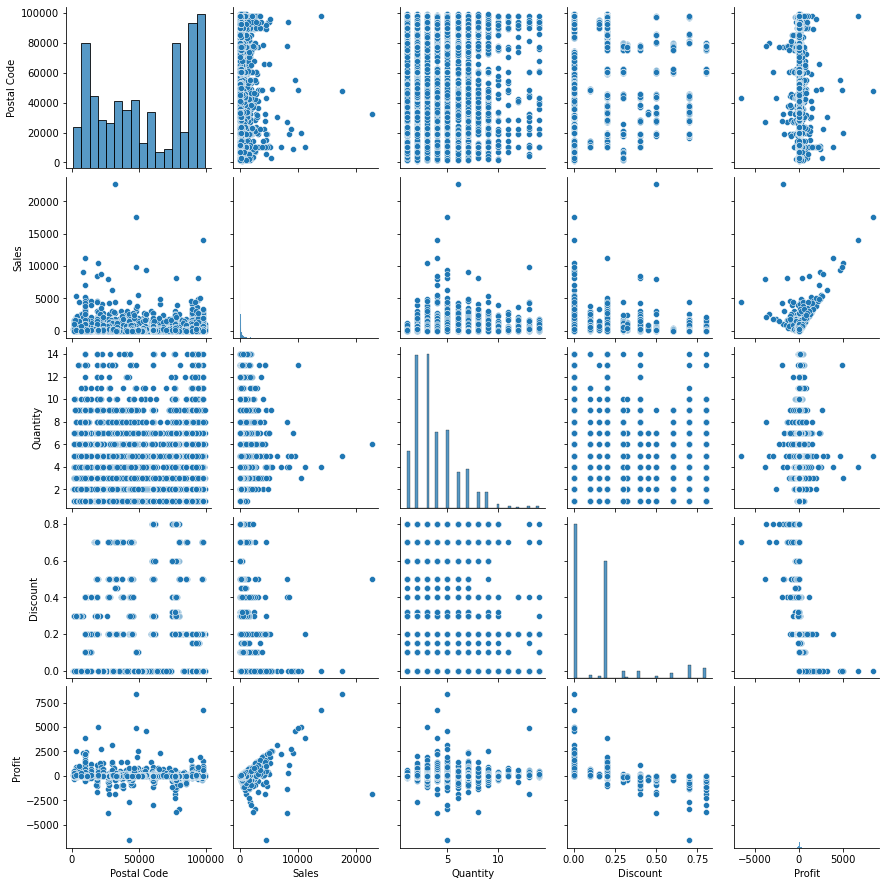

In [21]:
sns.pairplot(store_df)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.14 Top 10 States with high Profits:

<AxesSubplot:xlabel='State'>

<Figure size 720x360 with 0 Axes>

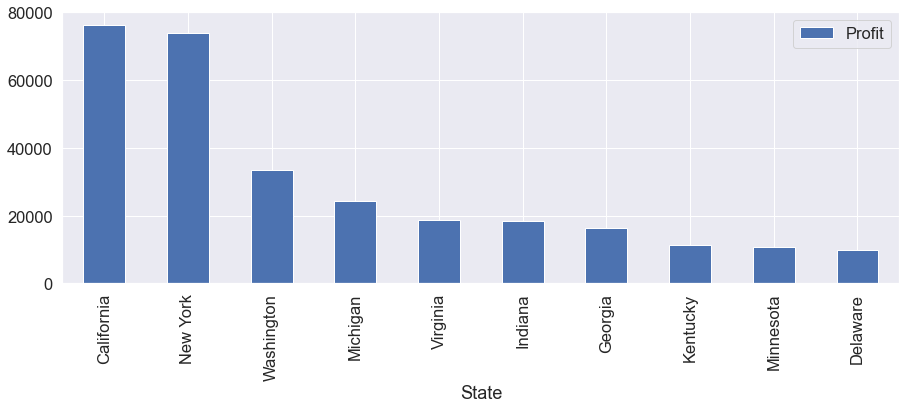

In [130]:
fig = plt.figure(figsize=(10,5))
store_df.groupby(['State'])['Profit'].sum().reset_index().sort_values(['Profit'],
                    ascending = False).head(10).plot(x = 'State', y = 'Profit', kind = 'bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.15 Top 10 States with high Sales:

<AxesSubplot:xlabel='State'>

<Figure size 1080x360 with 0 Axes>

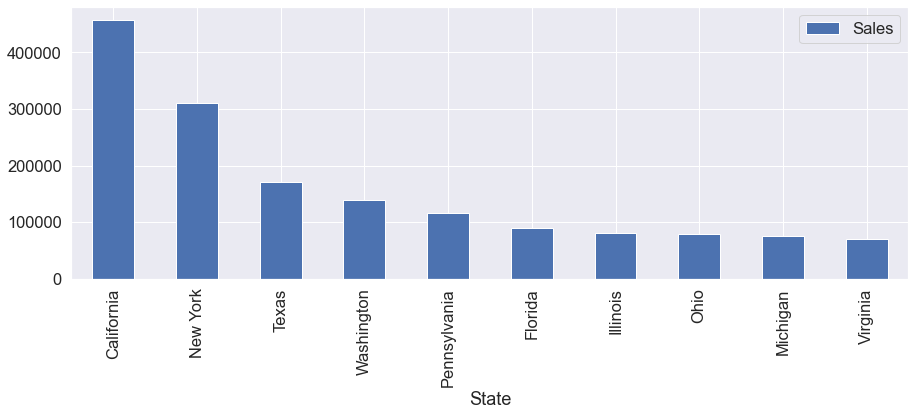

In [132]:
fig = plt.figure(figsize=(15,5))
store_df.groupby(['State'])['Sales'].sum().reset_index().sort_values(['Sales'],
                    ascending = False).head(10).plot(x = 'State', y = 'Sales', kind = 'bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.16 Top 10 States with high Losses:

<AxesSubplot:xlabel='State'>

<Figure size 1080x360 with 0 Axes>

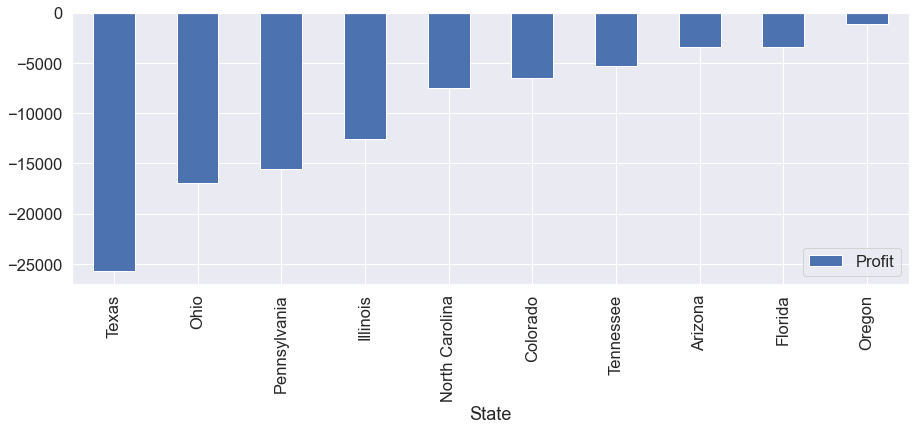

In [133]:
fig = plt.figure(figsize=(15,5))
store_df.groupby(['State'])['Profit'].sum().reset_index().sort_values(['Profit'],
                    ascending = True).head(10).plot(x = 'State', y = 'Profit', kind = 'bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.17 Top 10 States with Lower Sales:

<AxesSubplot:xlabel='State'>

<Figure size 576x360 with 0 Axes>

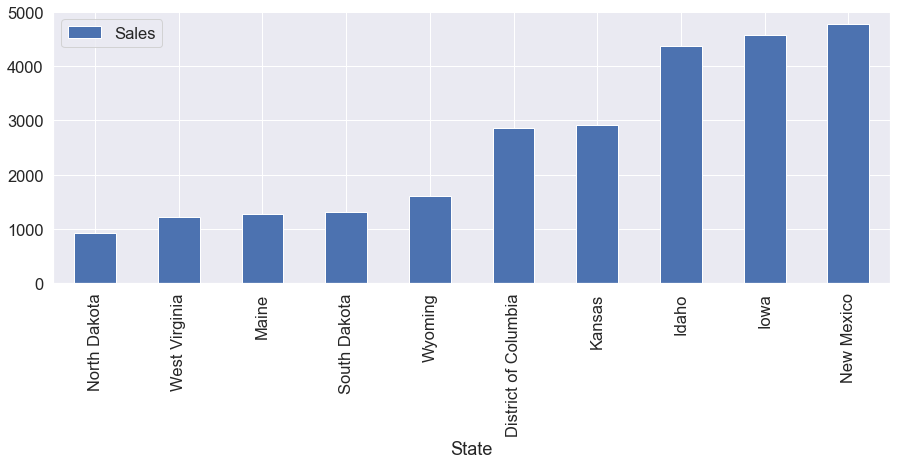

In [137]:
fig = plt.figure(figsize=(8,5))
store_df.groupby(['State'])['Sales'].sum().reset_index().sort_values(['Sales'],
                    ascending = True).head(10).plot(x = 'State', y = 'Sales', kind = 'bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.18 Profits with different categories:

<AxesSubplot:xlabel='Category', ylabel='Profit'>

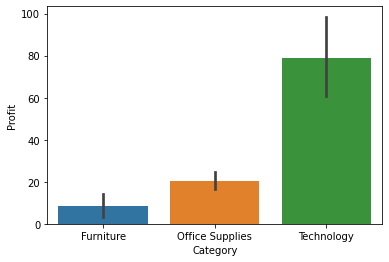

In [31]:
sns.barplot(x = 'Category', y = 'Profit', data = store_df)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.19 Discount distribution to each Segment and Category:

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

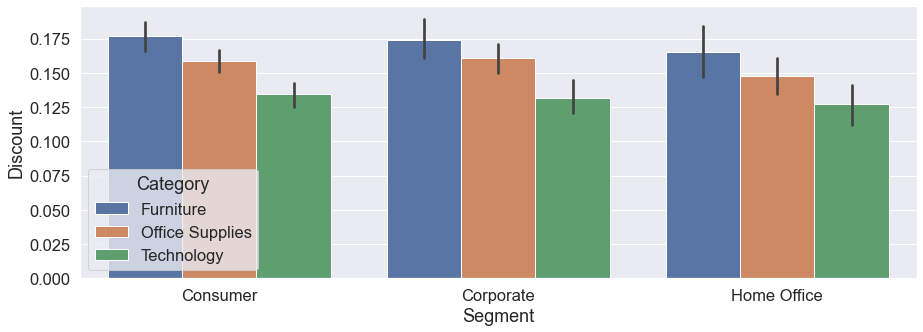

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(data = store_df, x = 'Segment', y = 'Discount', hue = 'Category')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.20 Check Profits with Different Ship Mode:

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

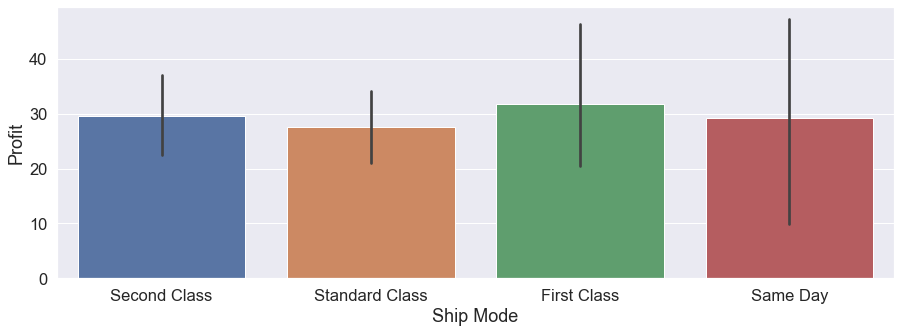

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(data = store_df, x = 'Ship Mode', y = 'Profit')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.21 Statewise higher profits by each category: 
    
Inferences: 
    
    1.maximum profits are from Technology and Office Supplies categories to the top 5 States.
    
    2.There is a less profit from the Furniture category.

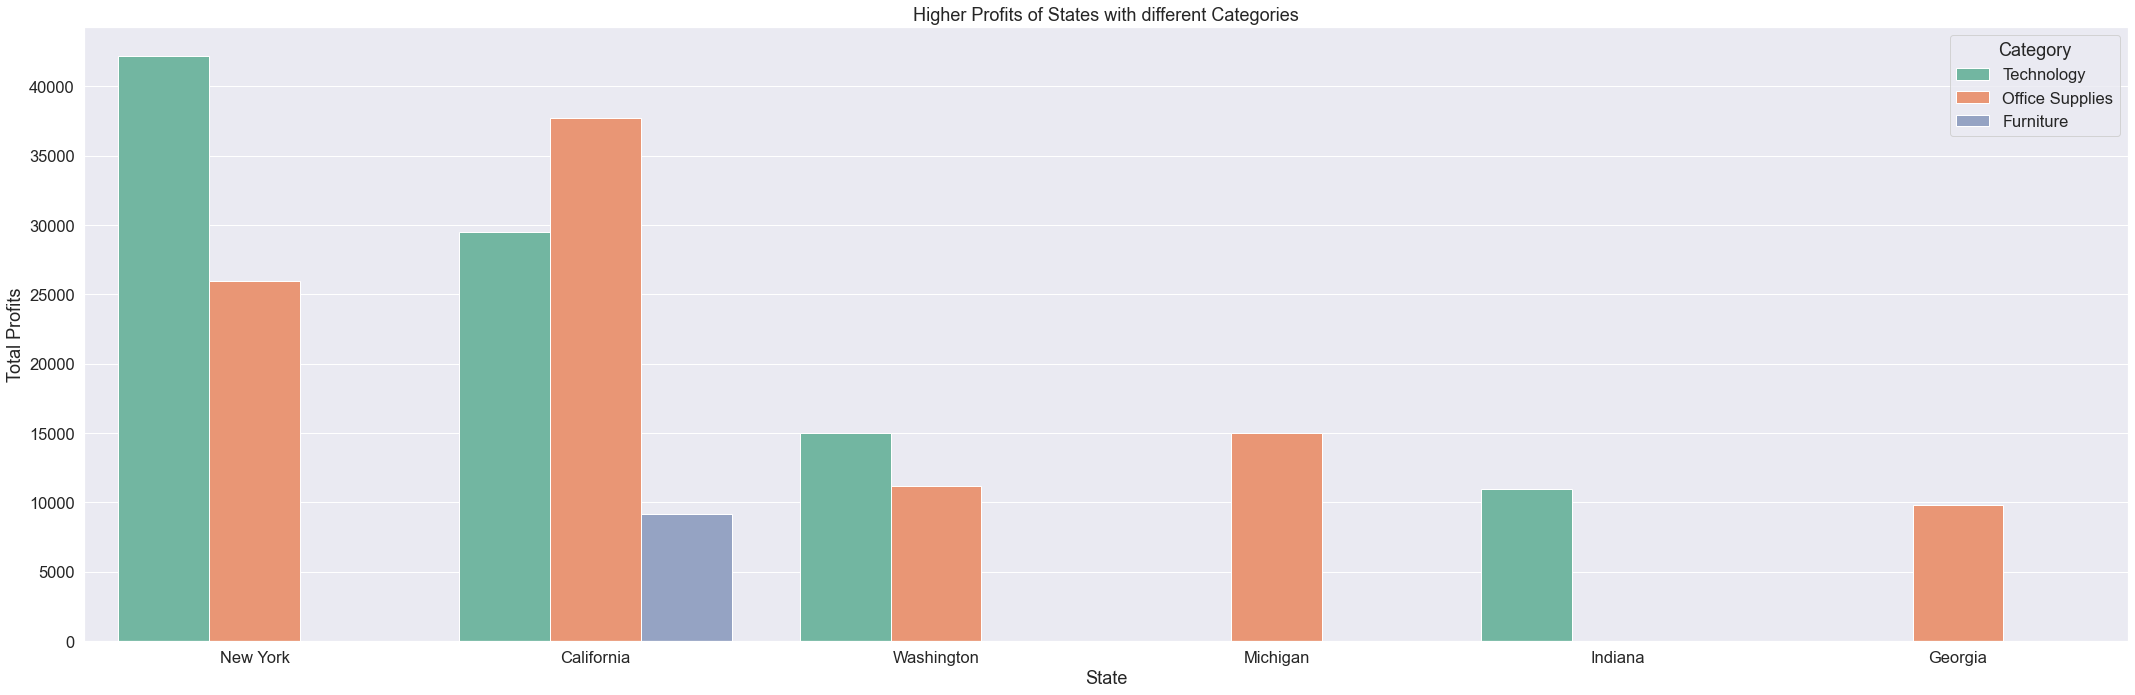

In [89]:
profit_sum = store_df['Profit'].groupby([store_df['State'], 
            store_df['Category']]).sum()
profit_sum =profit_sum.reset_index().sort_values(by='Profit',ascending = False)
low_profit_cnt = profit_sum.tail(5)
high_profit_cnt = profit_sum.head(10)
figure = plt.figure(figsize =(30,10))
plt.title('Statewise higher profits by each category')
sns.set(font_scale =1.5)
sns.barplot(x = 'State', y = 'Profit', hue = 'Category', data = high_profit_cnt, palette='Set2')
plt.ylabel('Total Profits')
plt.tight_layout()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.22 Check the statewise losses by each category:
    
    Inferences:
        
        1. Maximum losses are from Office Supplies and Furniture Category.

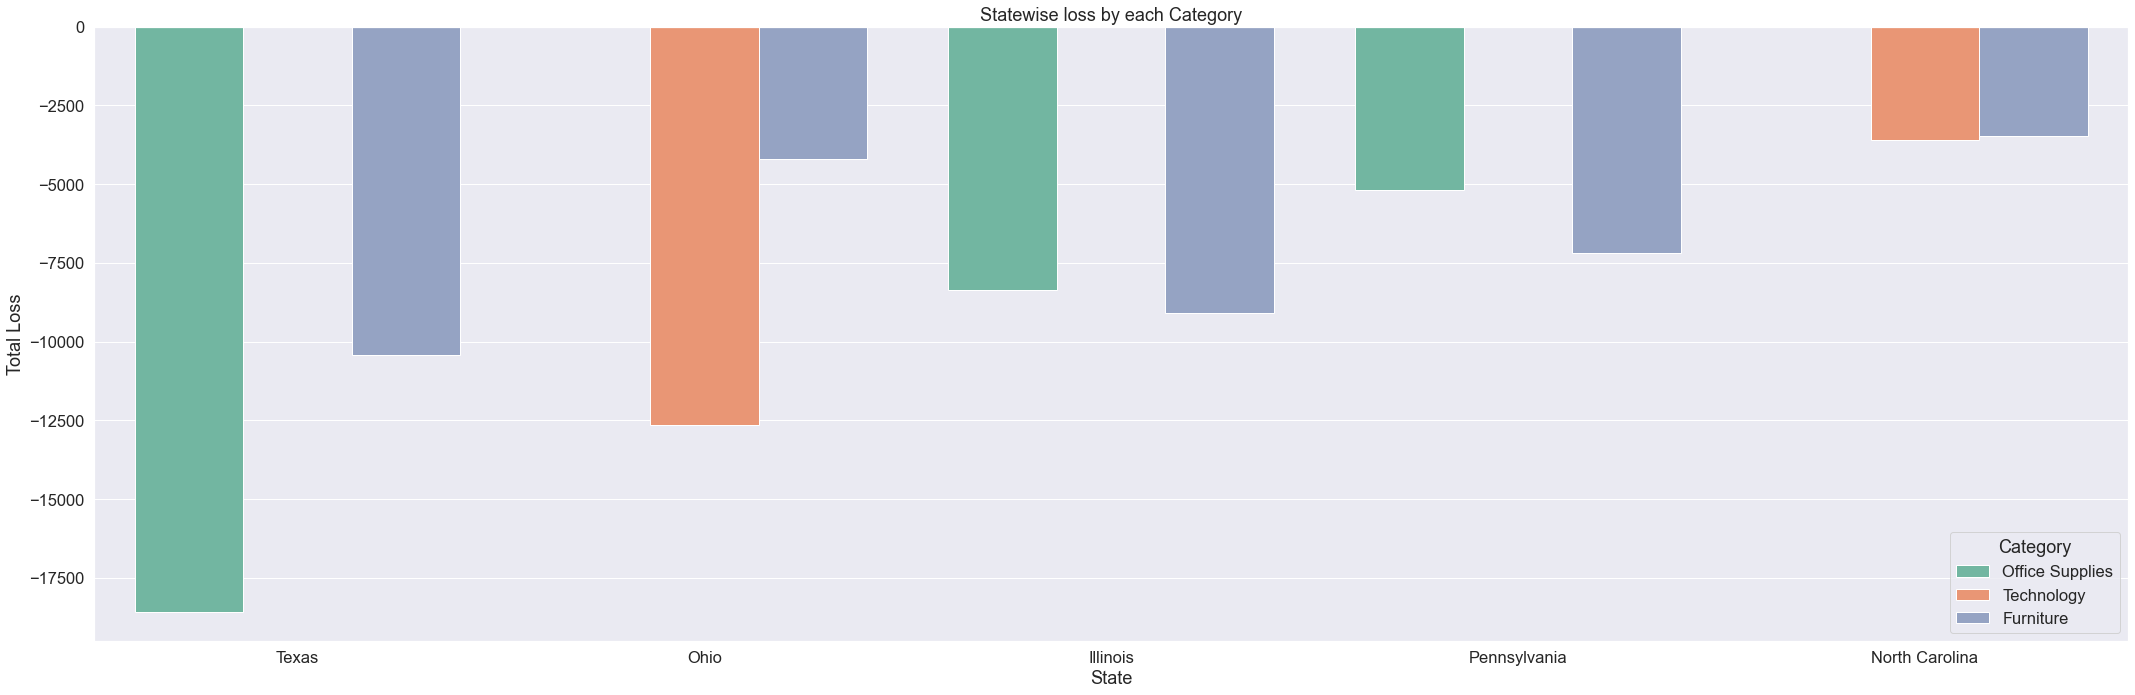

In [150]:
profit_sum = store_df['Profit'].groupby([store_df['State'], 
            store_df['Category']]).sum()
profit_sum =profit_sum.reset_index().sort_values(by='Profit',ascending = True)
low_profit_cnt = profit_sum.head(10)
high_profit_cnt = profit_sum.head(10)
figure = plt.figure(figsize =(30,10))
plt.title('Statewise loss by each Category')

sns.set(font_scale =1.5)
sns.barplot(x = 'State', y = 'Profit', hue = 'Category', data = low_profit_cnt, palette='Set2')
plt.ylabel('Total Loss')
plt.tight_layout()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.23 Check the Maximum discounts by each Category and States:
    
    Inference:
        
        1. We can see that the maximum discounts are given to office supplies and Furniture in the 
           below states that are under losses.
   
        2. There is a very less discount given to the Technology category.

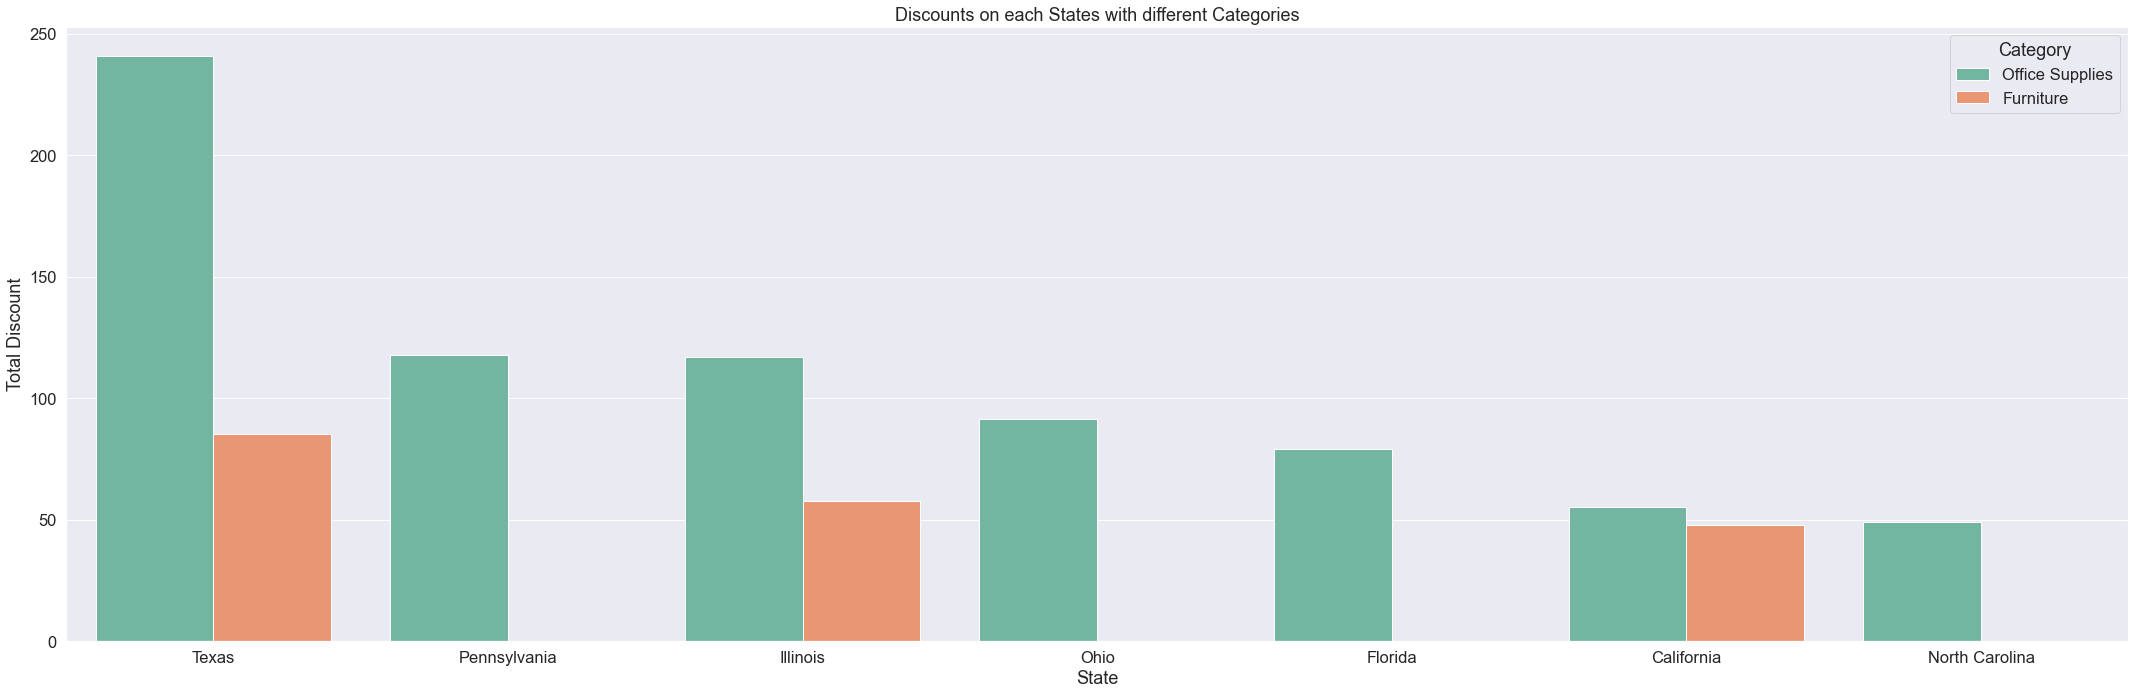

In [54]:
Discount_sum = store_df['Discount'].groupby([store_df['State'], 
            store_df['Category']]).sum()
Discount_sum =Discount_sum.reset_index().sort_values(by='Discount',ascending = False)
low_Discount = Discount_sum.tail(5)
high_Discount = Discount_sum.head(10)
figure = plt.figure(figsize =(30,10))
plt.title('Discounts on each States with different Categories')
sns.set(font_scale =1.5)
sns.barplot(x = 'State', y = 'Discount', hue = 'Category', data = high_Discount, palette='Set2')
plt.ylabel('Total Discount')
plt.tight_layout()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.24 Check the Sub-Categories that are under Losses and Profits:

<AxesSubplot:xlabel='Sub-Category'>

<Figure size 1080x360 with 0 Axes>

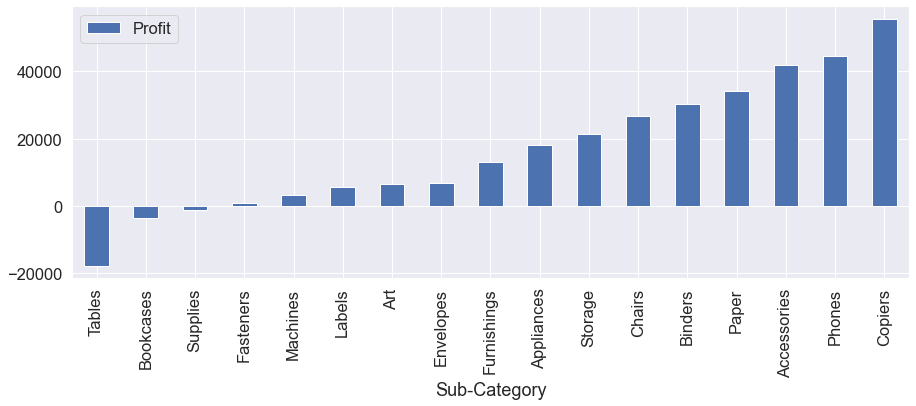

In [152]:
fig = plt.figure(figsize=(15,5))
store_df.groupby(['Sub-Category'])['Profit'].sum().reset_index().sort_values(['Profit'],
                    ascending = True).plot(x = 'Sub-Category', y = 'Profit', kind = 'bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.25 Check the Distribution of Category in the DataSet:

G:\projects.dataquest\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

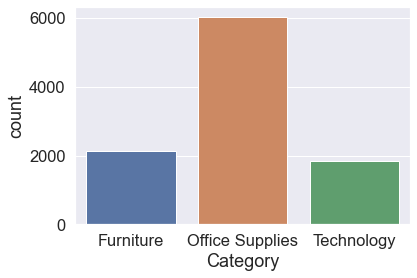

In [153]:
sns.countplot(store_df.Category)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.26 Check the Profits of each Category by Discount:
      
    Inferences:
        
        1.There is a negative correlation between the profit and discount.
        
        2. Maximum Discount are given to 'Office Supply Category' and hence there is a Loss.
        
        3. As ploted previously there is a highest distribution of office supply category and 
           should be taken care with Discounts given to these Sub-Categories.

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

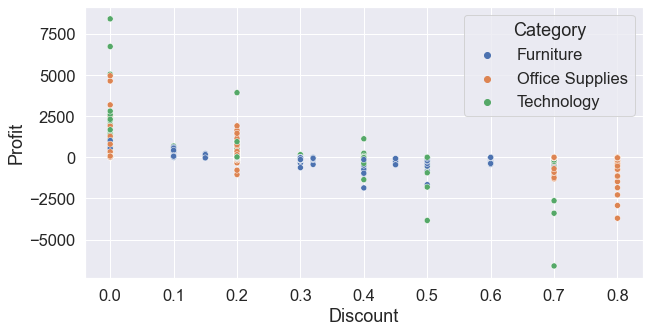

In [154]:
figure = plt.figure(figsize =(10,5))
sns.set(font_scale =1.5)
sns.scatterplot(x = 'Discount', y = 'Profit', hue = 'Category', data = store_df)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.27 Copy the data For Label Encoding

In [155]:
data1 = store_df.copy()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.28 Ship Mode Feature:

In [156]:
data1['Ship Mode'] = data1['Ship Mode'].astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     9994 non-null   category
 1   Segment       9994 non-null   object  
 2   Country       9994 non-null   object  
 3   City          9994 non-null   object  
 4   State         9994 non-null   object  
 5   Postal Code   9994 non-null   int64   
 6   Region        9994 non-null   object  
 7   Category      9994 non-null   object  
 8   Sub-Category  9994 non-null   object  
 9   Sales         9994 non-null   float64 
 10  Quantity      9994 non-null   int64   
 11  Discount      9994 non-null   float64 
 12  Profit        9994 non-null   float64 
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 947.0+ KB


In [157]:
data1['Ship Mode'] = data1['Ship Mode'].cat.codes
data1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,3,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,3,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [158]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   int8   
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), int8(1), object(7)
memory usage: 946.8+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.29 Heatmap: Check the correlation of Ship Mode to the Profit:
    
    Inferences:
        
        1. There is no Correlation between 'Ship Mode' and 'Profit' hence it has no affect on Profit.
        

<AxesSubplot:>

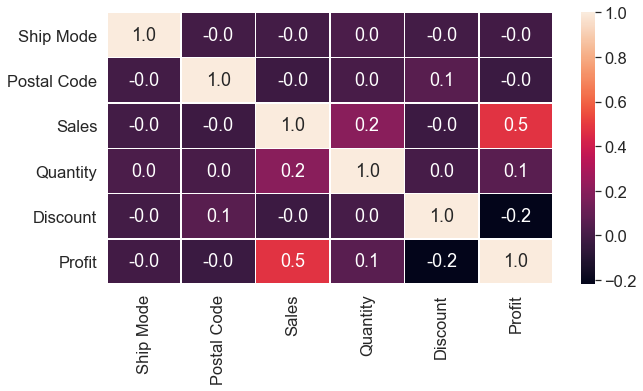

In [159]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.30 Summary of the Analysis:
    
Weak Areas of Profit:
    
1. Top 5 States with Losses:
    
    a.Texas
    
    b.Ohio
    
    c.Pennnsylvania
    
    d.Illinois
    
    e.North Carolina
    
    
2. Top 5 States with less Sales:
    
    a.North Dokata
    
    b.West Virginia
    
    c.Maine 
    
    d.South Dakota
    
    e.Wyoming
    
    
3. Categories with Less Profit and losses:
    
    a.Office Supplies
    
    b.Furniture
    
    
4. High Discount with each Category:
    
    a. Office Supply
    
    b. Furniture

    
5. Conclusion:
        
        1.There is a negative correlation between the profit and discount.
        
        2. Maximum Discount are given to 'Office Supply Category' and the distribution or the sales of this category in the dataset is high and hence there is a Loss.
        
        3. There is No relation of Ship Mode to the Losses incurred.